# Importing Necessary Libraries

In [13]:
import pandas as pd
import json
from datetime import datetime
import hashlib
import matplotlib.pyplot as plt

# Reading the JSON file

In [3]:
with open('DataEngineeringQ2.json') as file:
    data = json.load(file)

c.
Add a column isValidMobile of boolean which contains the values true or false against each value from
phoneNumber column If a phone number is a valid Indian phone number.
true : indicates number is valid
false : indicates number is not valid
* Design a logic to check whether a phone number is valid or not
* General rules to check -
1. A valid number can have '+91' or '91' as prefix, a valid number must lie be between
6000000000-9999999999
eg : +919876787687 is valid
919877475896 is valid
+913454768688 is invalid
9876787687 is valid
3454768688 is invalid
57769666 is invalid


In [4]:
def calculate_age(date_of_birth):
    if date_of_birth is None:
        return None
    today = datetime.now()
    birth_date = datetime.strptime(date_of_birth, '%Y-%m-%dT%H:%M:%S.%fZ')
    age = today.year - birth_date.year
    if today.month < birth_date.month or (today.month == birth_date.month and today.day < birth_date.day):
        age -= 1
    return age

e.
Add a column Age which will contain the age in integer of the person, use DOB column to calulate the
age.
* if DOB is 2000-01-01T00:00:00.000Z then Age should be 23
* if DOB is 2000-06-01T00:00:00.000Z then Age should be 22
* if DOB is null then age should be null

In [5]:
def is_valid_mobile(phone_number):
    if phone_number.startswith('+91') or phone_number.startswith('91'):
        number = phone_number[-10:]
        if number.isnumeric() and 6000000000 <= int(number) <= 9999999999:
            return True
    return False

d.
Add a column phoneNumberHash which contains hash against only valid number and null in case of
invalid from phoneNumber column.
* Use SHA256 hashing algorithm to hash the mobile number
* Number +919876776576 and 9876776576 should have same hash

In [6]:
def generate_hash(phone_number):
    return hashlib.sha256(phone_number.encode()).hexdigest()

a.
Read the json file and select the columns mentioned below :
1. appointmentId
2. phoneNumber
3. firstName (from patientDetails)
4. lastName (from patientDetails)
5. gender (from patientDetails)*
6. birthDate (from patientDetails)**
7. medicines (from consultationData)
* Transform gender column data as mentioned below
'M' to male
'F' to female
null/Anything else to others
** Rename birthDate column as DOB

b.
Create a derived column fullName from fisrtName and lastName separated by a " " (space).
* if firstName is 'abc' and lastName is 'xyz' then fullName must be 'abc xyz'


f.
Add below aggrigated columns against unique appointmentId---
Add a column noOfMedicines which will contain the number of medicines prescribed against each
appointmentId.
Add a column noOfActiveMedicines which will contain the number of active medicines prescribed
against each appointmentId.
Add a column noOfInActiveMedicines which will contain the number of inactive medicines prescribed
against each appointmentId.
* If the value of IsActive Column is true , that means medicine is active
* If the value of IsActive Column is false , that means medicine is inactive


g.
Add a column medicineNames which should contain the name of all active medicines separated by a
character "," (comma) against each appointmentId.

In [7]:
appointments = []
for record in data:
    patient_details = record['patientDetails']
    gender = patient_details.get('gender', None)
    gender_transformed = 'male' if gender == 'M' else 'female' if gender == 'F' else 'others'
    
    fullName = patient_details['firstName'] + ' ' + patient_details['lastName']
    phoneNumber = record['phoneNumber']
    
    isValidMobile = is_valid_mobile(phoneNumber)
    phoneNumberHash = generate_hash(phoneNumber) if isValidMobile else None
    
    age = calculate_age(patient_details.get('birthDate', None))
    
    medicines = record['consultationData']['medicines']
    noOfMedicines = len(medicines)
    noOfActiveMedicines = sum(1 for med in medicines if med['isActive'])
    noOfInactiveMedicines = noOfMedicines - noOfActiveMedicines
    
    activeMedicineNames = ", ".join(med['medicineName'] for med in medicines if med['isActive'])
    
    appointment = {
        'appointmentId': record['appointmentId'],
        'fullName': fullName,
        'phoneNumber': phoneNumber,
        'isValidMobile': isValidMobile,
        'phoneNumberHash': phoneNumberHash,
        'gender': gender_transformed,
        'DOB': patient_details.get('birthDate', None),
        'Age': age,
        'noOfMedicines': noOfMedicines,
        'noOfActiveMedicines': noOfActiveMedicines,
        'noOfInActiveMedicines': noOfInactiveMedicines,
        'MedicineNames': activeMedicineNames
    }
    appointments.append(appointment)

In [8]:
data = pd.DataFrame(appointments)

In [9]:
columns = [
    'appointmentId',
    'fullName',
    'phoneNumber',
    'isValidMobile',
    'phoneNumberHash',
    'gender',
    'DOB',
    'Age',
    'noOfMedicines',
    'noOfActiveMedicines',
    'noOfInActiveMedicines',
    'MedicineNames'
]

In [10]:
data = data[columns]

h.
1. Export the aggregated data in json file format
Keys:
1. Age
2. gender
3. validPhoneNumbers (no of valid mobile numbers)
4. appointments (no of appointments)
5. medicines (no of medicines prescribed)
6. activeMedicines (no of active medicines prescribed)

In [11]:
data.to_json('Final_DataFrame.json')

Your final dataframe should have these columns, Export this dataframe in a csv file with no index and use'~'
separator:-
1. appointmentId
2. fullName
3. phoneNumber
4. isValidMobile
5. phoneNumberHash
6. gender
7. DOB
8. Age
9. noOfMedicines
10. noOfActiveMedicines
11. noOfInActiveMedicines
12. MedicineNames

In [12]:
data

,appointmentId,fullName,phoneNumber,isValidMobile,phoneNumberHash,gender,DOB,Age,noOfMedicines,noOfActiveMedicines,noOfInActiveMedicines,MedicineNames
0,40d2-9c9f,Css,96686896670,False,None,others,None,NaN,2,1,1,A
1,40dbtc9f,Lokesh,9496368916,False,None,male,1996-05-16T18:30:00.000Z,27.0,2,1,1,A
2,g3Wt5c9f,Shila Das,7787204833,False,None,others,None,NaN,3,2,1,"B, C"
3,fb6-a535,Bhavika Ben Panchal,9376756879,False,None,female,1988-04-24T14:30:00.000Z,35.0,1,1,0,B
4,67h7KL9,Raghu Viju,5267384241,False,None,others,None,NaN,2,2,0,"D, A"
5,Hy7Y91,Dinesh Kumar,+919826374025,True,75e57674aa775dc27840354bdafeb34ce8d07ca858e392...,male,1983-05-16T18:30:00.000Z,40.0,4,2,2,"A, E"
6,10dY8a-4a,Lalit Sankhwal,7587265252,False,None,male,2003-06-27T14:30:00.000Z,19.0,2,2,0,"D, E"
7,e8056Ye8,Ravi,5586958767,False,None,others,None,NaN,1,1,0,A
8,dbc0-c66b,Dinesh,9987602525,False,None,male,1983-05-16T18:30:00.000Z,40.0,1,1,0,E
9,1576a7,Sanjay,9234354366,False,None,male,1998-05-16T18:30:00.000Z,25.0,0,0,0,


In [15]:
aggregated_data = {
    'Age': data['Age'].mean(),
    'gender': data['gender'].value_counts().to_dict(),
    'validPhoneNumbers': data['isValidMobile'].sum(),
    'appointments': len(data),
    'medicines': data['noOfMedicines'].sum(),
    'activeMedicines': data['noOfActiveMedicines'].sum()
}

In [16]:
aggregated_data['Age'] = int(aggregated_data['Age'])
aggregated_data['validPhoneNumbers'] = int(aggregated_data['validPhoneNumbers'])
aggregated_data['appointments'] = int(aggregated_data['appointments'])
aggregated_data['medicines'] = int(aggregated_data['medicines'])
aggregated_data['activeMedicines'] = int(aggregated_data['activeMedicines'])

In [17]:
with open('aggregated_data.json', 'w') as file:
    json.dump(aggregated_data, file, indent=4)

2. Plot a pie chart for number of appointments against gender

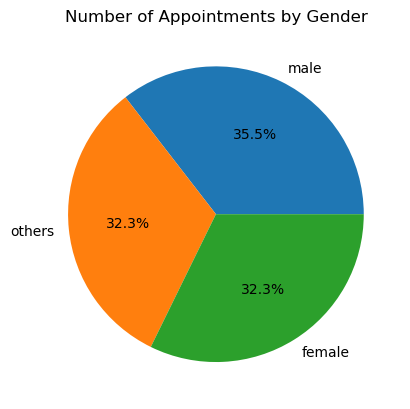

In [19]:
gender_counts = data['gender'].value_counts()
labels = gender_counts.index
values = gender_counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Number of Appointments by Gender')
plt.show()